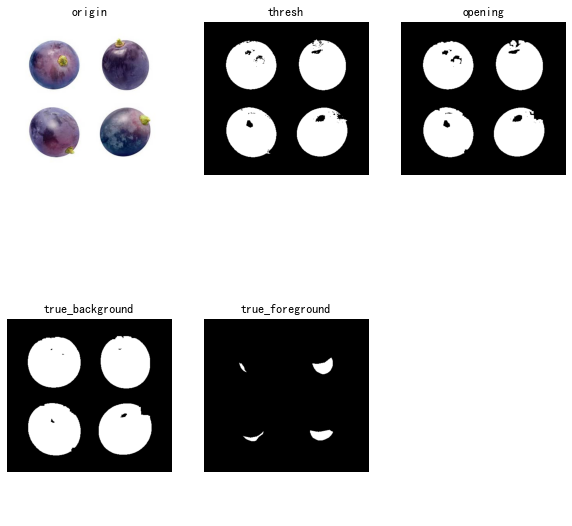

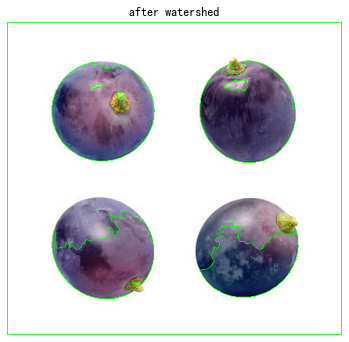

In [8]:
"""
opencv实现分水岭算法：
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt


def watershed(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret0, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # 确定背景区域
    true_background = cv2.dilate(opening, kernel, iterations=3)

    # 确定前景区域
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
    ret1, true_foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

    # 查找未知区域
    true_foreground = np.uint8(true_foreground)
    unknown = cv2.subtract(true_background, true_foreground)

    # 标记标签
    ret2, markers1 = cv2.connectedComponents(true_foreground)
    markers = markers1+1
    markers[unknown==255] = 0

    markers3 = cv2.watershed(img, markers)
    img[markers3 == -1] = [0,255,0]
    return thresh,opening,true_background,true_foreground,img


img_origin = cv2.imread("./th.jpg")
img = img_origin.copy()
thresh, opening, true_background, true_foreground, img = watershed(img)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(2, 3, figsize=(10, 10))
# f.suptitle('实现分水岭算法')
plt.subplot(231), plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)),
plt.title('origin'), plt.axis('off')
plt.subplot(232), plt.imshow(thresh, cmap='gray'),
plt.title("thresh"), plt.axis('off')
plt.subplot(233), plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB), cmap='gray'),
plt.title('opening'), plt.axis('off')

plt.subplot(234), plt.imshow(cv2.cvtColor(true_background, cv2.COLOR_BGR2RGB), cmap='gray'),
plt.title('true_background'), plt.axis('off')
plt.subplot(235), plt.imshow(cv2.cvtColor(true_foreground, cv2.COLOR_BGR2RGB), cmap='gray'),
plt.title('true_foreground'), plt.axis('off')
plt.subplot(236), plt.axis('off')

f = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.title('after watershed'), plt.axis('off')
plt.show()

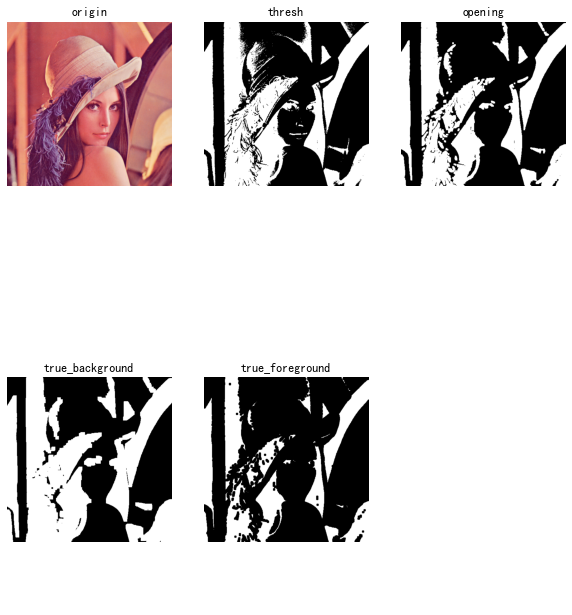

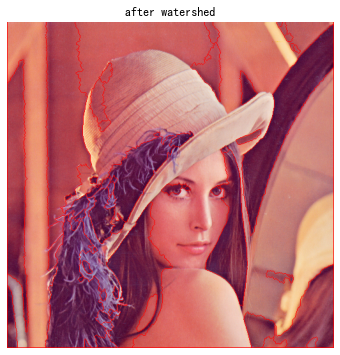

In [9]:
"""
python实现分水岭算法步骤：
1、加载原始图像
2、阈值分割，将图像分割为黑白两个部分
3、对图像进行开运算，即先腐蚀在膨胀
4、对开运算的结果再进行 膨胀，得到大部分是背景的区域
5、通过距离变换 Distance Transform 获取前景区域
6、背景区域sure_bg 和前景区域sure_fg相减，得到即有前景又有背景的重合区域
7、连通区域处理
8、最后使用分水岭算法
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step1. 加载图像
img_origin = cv2.imread("./lena.png")
img = img_origin.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Step2.阈值分割，将图像分为黑白两部分
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step3. 对图像进行“开运算”，先腐蚀再膨胀
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step4. 对“开运算”的结果进行膨胀，得到大部分都是背景的区域
true_background = cv2.dilate(opening, kernel, iterations=3)

# Step5.通过distanceTransform获取前景区域
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)  # DIST_L1 DIST_C只能 对应掩膜为3    DIST_L2 可以为3或者5
ret, true_foreground = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)

# Step6. sure_bg与sure_fg相减,得到既有前景又有背景的重合区域   #此区域和轮廓区域的关系未知
true_foreground = np.uint8(true_foreground)
unknow = cv2.subtract(true_background, true_foreground)

# Step7. 连通区域处理
ret, markers = cv2.connectedComponents(true_foreground, connectivity=8) #对连通区域进行标号  序号为 0-N-1
markers = markers + 1      # OpenCV 分水岭算法对物体做的标注必须都大于1，背景为标号为0, 因此对所有markers加1, 变成了1 - N
#去掉属于背景区域的部分（即让其变为0, 成为背景）
# “unknow==255” 返回的是图像矩阵的真值表。
markers[unknow==255] = 0

# Step8.分水岭算法
markers = cv2.watershed(img, markers)  #分水岭算法后，所有轮廓的像素点被标注为-1
# print(markers)

img[markers == -1] = [0, 0, 255]   # 标注为-1 的像素点标 红

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(2, 3, figsize=(10, 12))
# f.suptitle('实现分水岭算法')
plt.subplot(231), plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)),
plt.title('origin'), plt.axis('off')
plt.subplot(232), plt.imshow(thresh, cmap='gray'),
plt.title("thresh"), plt.axis('off')
plt.subplot(233), plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB), cmap='gray'),
plt.title('opening'), plt.axis('off')

plt.subplot(234), plt.imshow(cv2.cvtColor(true_background, cv2.COLOR_BGR2RGB), cmap='gray'),
plt.title('true_background'), plt.axis('off')
plt.subplot(235), plt.imshow(cv2.cvtColor(true_foreground, cv2.COLOR_BGR2RGB), cmap='gray'),
plt.title('true_foreground'), plt.axis('off')
plt.subplot(236), plt.axis('off')

f = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.title('after watershed'), plt.axis('off')
plt.show()